<a href="https://colab.research.google.com/github/LeJ-04/amazon-products-rating-ml-project/blob/main/ProjetML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [66]:
# Mandatory libraries
import pandas as pd
import numpy as np

# Cleaning reviews
import re
import string

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data_original = pd.read_csv('sample_data/amazon.csv')
data = data_original.copy()

# Part 1: CLEANING AND STANDARDIZATION

### 1.0. Loading & Initial Exploratory Data

In [25]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [27]:
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

The type of all the values is object for all the columns.
The values in the 'rating' column are objects and not float because of the symbol '₹'. We need to convert this column to get numeric values.  

In [28]:
data.describe(include='all')['product_name']

,product_name
count,1465
unique,1337
top,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat..."
freq,5


Among these 1465 products, 1337 are unique.

In [29]:
data.describe(include='all')['rating']

,rating
count,1465
unique,28
top,4.1
freq,244


As the values in the rating column are objects, we can't observe the min, max and mean of the rating. We need to transform them with a function.

### 1.1. Cleaning

In [30]:
data.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


We notice that the values are missing in the 'rating_count', 2 in total.

We check if rating, review_title and review_content have missing values. It is crucial to clean the dataset, otherwise the NLP part won't work (we already saw but we use different methods better for the visualization).

In [31]:
nb_missing_rating = data['rating'].isna().sum()
print("missing rating ?",  nb_missing_rating)
nb_missing_review_title = data['review_title'].isna().sum()
print("missing review_title ?", nb_missing_review_title)
nb_missing_review_content = data['review_content'].isna().sum()
print("missing review_content ?", nb_missing_review_content)

missing rating ? 0
missing review_title ? 0
missing review_content ? 0


In [32]:
display("Actual price column", data.actual_price.head())
display("Discounted price column", data.discounted_price.head())
display("Rating count column", data.rating_count.head())

'Actual price column'

,actual_price
0,"₹1,099"
1,₹349
2,"₹1,899"
3,₹699
4,₹399


'Discounted price column'

,discounted_price
0,₹399
1,₹199
2,₹199
3,₹329
4,₹154


'Rating count column'

,rating_count
0,"24,269"
1,"43,994"
2,"7,928"
3,"94,363"
4,"16,905"


Like we said, certains columns are not in the right format. For the data manipulation, we need to transform the data type, especially in the actual price, discounted price and the rating count to change the type from object  into numerical values.  

Define cleaning function for currency strings



In [33]:
def clean_currency(x):
    if isinstance(x, str):
        # Remove the rupee symbol and commas, then convert to float
        x = x.replace('₹', '').replace(',', '').strip()
        try:
            return float(x)
        except ValueError:
            return np.nan
    return x

Apply cleaning to Numerical Variables

In [34]:
data['discounted_price'] = data['discounted_price'].apply(clean_currency)
data['actual_price'] = data['actual_price'].apply(clean_currency)
data['rating_count'] = data['rating_count'].apply(clean_currency)

In [35]:
display("Columns after cleaning the columns")
display("Actual price column", data.actual_price.head())
display("Discounted price column", data.discounted_price.head())
display("Rating count column", data.rating_count.head())

'Columns after cleaning the columns'

'Actual price column'

,actual_price
0,1099.0
1,349.0
2,1899.0
3,699.0
4,399.0


'Discounted price column'

,discounted_price
0,399.0
1,199.0
2,199.0
3,329.0
4,154.0


'Rating count column'

,rating_count
0,24269.0
1,43994.0
2,7928.0
3,94363.0
4,16905.0


In [62]:
data.discount_percentage.head()

,discount_percentage
0,64%
1,43%
2,90%
3,53%
4,61%


We need also to to get the discount percentage column into nummerical column.

In [63]:
data['discount_percentage'] = data['discount_percentage'].astype(str).str.replace('%', '').astype(float)
data.discount_percentage.head()

,discount_percentage
0,64.0
1,43.0
2,90.0
3,53.0
4,61.0


We also clean the rating column (handling any non-numeric chars).

In [36]:
data.rating.isna().sum()

np.int64(0)

In [44]:
for i,r in enumerate(data.rating):
    if type(r) is not str:
      print("index:",i, "| rating:", r)

In [45]:
data['rating'] = pd.to_numeric(data['rating'].astype(str).str.replace('|', '', regex=False), errors='coerce')
data.rating.head()

,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2


In [46]:
data.rating.isna().sum()

np.int64(1)

Here, after applying the function in the rating column, we identify 1 missing value. Therefore, we drop rows where critical text and numeric values are missing (even if we already check for the review content and review title.)

In [47]:
data.dropna(subset=['rating', 'review_content', 'review_title'], inplace=True)

Like we said in the analysis data part, there are some missing values detected and imputed in rating count. Instead of removing the lines, we fill the empty values with the median imputation.

In [48]:
print("missing values in 'rating_count' (before): ",data.rating_count.isna().sum())

rating_count_median = data['rating_count'].median()
data['rating_count'] = data['rating_count'].fillna(rating_count_median)

print("missing values in 'rating_count' (after the filling):",data.rating_count.isna().sum())

missing values in 'rating_count' (before):  2
missing values in 'rating_count' (after the filling): 0


We don't need to handle text and rating missing values because there isn't missing values.

In [49]:
data.category.head()

,category
0,Computers&Accessories|Accessories&Peripherals|...
1,Computers&Accessories|Accessories&Peripherals|...
2,Computers&Accessories|Accessories&Peripherals|...
3,Computers&Accessories|Accessories&Peripherals|...
4,Computers&Accessories|Accessories&Peripherals|...


Here, the text (product's category) is unreadable so to fix it, we extract the root category in a new feature column.

In [50]:
data['main_category'] = data['category'].astype(str).str.split('|').str[0]
data.main_category.head()

,main_category
0,Computers&Accessories
1,Computers&Accessories
2,Computers&Accessories
3,Computers&Accessories
4,Computers&Accessories


We also add the len of the review for more analysis.

In [51]:
data['review_len'] = data['review_content'].apply(len)
data.review_len.head()

,review_len
0,483
1,1186
2,271
3,443
4,2451


In this dataset, there are many review in different language, like hindi review : we need to convert all the review in just one language (in this project, it must be in english).

To do this, firstly, we use the library "langdetect" to identify the language of each review_content.

In [54]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=bfc6185cee6511269be38b5199d92f4114ea3585b6542ca2664778ccb5781ba5
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


We create a function that return the review's language. The funcion returns a error message if the function can't identify the language or the reviews are too short or empty.

In [55]:
from langdetect import detect, DetectorFactory, LangDetectException
import warnings

DetectorFactory.seed = 0
warnings.filterwarnings("ignore", category=UserWarning, module='langdetect')

def detect_safe(text):
    if not isinstance(text, str) or len(text.strip()) < 10:
        return 'short_or_empty'
    try:
        return detect(text)
    except LangDetectException:
        return 'error'

In [56]:
data['language_rtitle'] = data['review_title'].apply(detect_safe)
data['language_rcontent'] = data['review_content'].apply(detect_safe)

display("Language review_title",data['language_rtitle'].value_counts())
display("Language review_content", data['language_rcontent'].value_counts())

'Language review_title'

,count
language_rtitle,
en,1461
pt,1
te,1
short_or_empty,1


'Language review_content'

,count
language_rcontent,
en,1462
te,1
hi,1


We can display the non-englsih reviews

In [57]:
non_english_rtitle = data[ (data['language_rtitle'] != 'en') & (data['language_rtitle'] != 'short_or_empty') ]
non_english_rcontent = data[ (data['language_rcontent'] != 'en') & (data['language_rcontent'] != 'short_or_empty') ]

for index, row in non_english_rtitle.iterrows():
    print("Index", index,":")
    print(f"\tReview Title: {row['review_title']}")
    print(f"\tReview Title language: {row['language_rtitle']}")
for index, row in non_english_rcontent.iterrows():
    print("Index", index,":")
    print(f"\tReview Content: {row['review_content']}")
    print(f"\tReview Content language:: {row['language_rcontent']}")

Index 155 :
	Review Title: do not buy
	Review Title language: pt
Index 1379 :
	Review Title: Water heating not good as per standard,నాకు ప్రొడక్ట్ ప్లగ్ డామేజ్ అయింది ఇప్పుడు రెండు నెలలు అయింది నాకు ప్రొడక్ట్ ప్లగ్ ఇప్పించగలరు,Good Product for Heating purpose,Good product,Easy , compact and quick solution,Ok product,Not worthy,Useful
	Review Title language: te
Index 323 :
	Review Content: Best but slow response from tv,Product is good,https://m.media-amazon.com/images/I/71Knz9n24GL._SY88.jpg,Value for money,Super quality....go with TCL,,Best price,చాలా బాగుంది కానీ యుాస్ బి పోర్ట్స్ లోపల కాకుండా బయటికి ఇస్తే బాగుంటుంది మరియు గుాగుల్ క్రోమ్ ఇన్ బుల్ట్ గా ఇస్తే బాగుంటుంది
	Review Content language:: te
Index 1331 :
	Review Content: Ok product 900/ma bast product A little family productNot resturant not hotel,No,Nice product,Good product,For Dry grinding of spices, motor heats up,👍,भाई कभी मत लेना नहीं तो पछतायो गे 6 महीना ईयूज किया हू और ये लोग वारंटी भी नहीं देते हैं कभी को कस्टमर नम्बर 

4 non-english or very short reviews. As there are only few ones, we can directly remove on the dataset. Hovewer, if there were more, we would apply a translation foe non-english reviews.  

In [59]:
indices_to_drop = [155, 1379, 323, 1331]
print(f"Shape before the removing of certains reviews: {data.shape}")
data.drop(indices_to_drop, inplace=True)
print(f"New shape of the DataFrame: {data.shape}")

Shape before the removing of certains reviews: (1460, 20)


KeyError: '[155, 1379, 323, 1331] not found in axis'

### Pré-processing et Feature Engineering (data text)

1. we try to gather the title reviews and the content reviws in single column.

In [69]:
data['full_review'] = data['review_title'].fillna('') + ' ' + data['review_content'].fillna('')
data['full_review'].head()

,full_review
0,"Satisfied,Charging is really fast,Value for mo..."
1,"A Good Braided Cable for Your Type C Device,Go..."
2,"Good speed for earlier versions,Good Product,W..."
3,"Good product,Good one,Nice,Really nice product..."
4,"As good as original,Decent,Good one for second..."


We observe that the full review isn't readable. To get a effective model, we need to provide it clean data that can be readable by the model. Therefore, we transform the text. The solution is a function that handles all the useless informations by removing them (remove brackets, URLs, words containing numbers).

In [70]:
def clean_text(text):
    text = str(text).lower() # Lowercase
    text = re.sub(r'\[.*?\]', '', text) # Remove brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub(r'<.*?>+', '', text) # Remove HTML
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) # Remove Punctuation
    text = re.sub(r'\n', '', text) # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text) # Remove words containing numbers
    return text

Then, once the function is implemented, we add a other column with the clean reviews specially for the model.

In [71]:
data['cleaned_review'] = data['full_review'].apply(clean_text)

We update review length based on cleaned text.

In [72]:
data['review_len'] = data['cleaned_review'].apply(len)
data['word_count'] = data['cleaned_review'].apply(lambda x: len(str(x).split()))

**Data Cleaning and Preprocessing are now complete.**

In [73]:
print(f"Shape: {data.shape}")
print(f"Missing Values after imputation:\n{data.isnull().sum()}")

Shape: (1460, 23)
Missing Values after imputation:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
main_category          0
review_len             0
language_rtitle        0
language_rcontent      0
full_review            0
cleaned_review         0
word_count             0
dtype: int64


# **Part 2: Exploratory Data Analysis (EDA)**

Set the aesthetic style of the plots

In [74]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Univariate Analysis

**FIGURE 1: Distribution of Product Ratings**

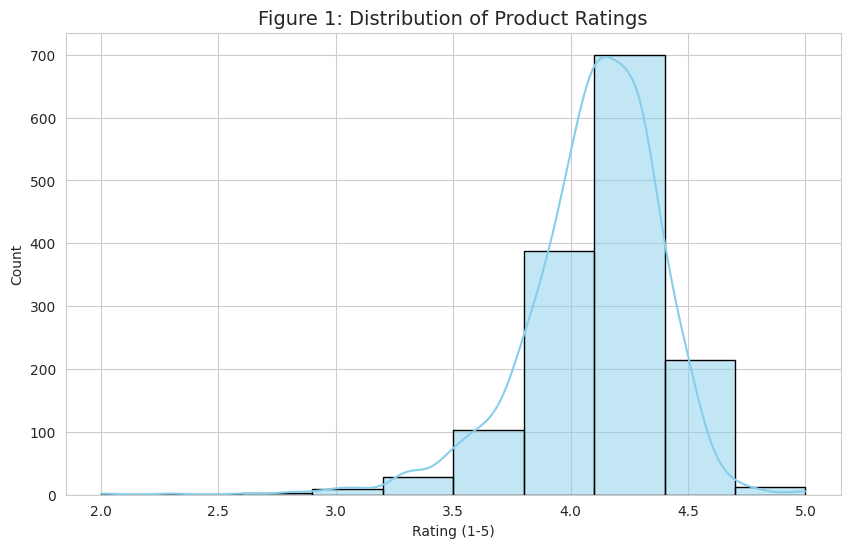

In [75]:
plt.figure()
sns.histplot(data['rating'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Figure 1: Distribution of Product Ratings', fontsize=14)
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')
plt.show()

The figure shows the class imbalance (most ratings are > 4.0).

**FIGURE 2: Distribution of Discounted Prices (Log Scale)**

We use log_scale=True as specified in the report to handle extreme price differences

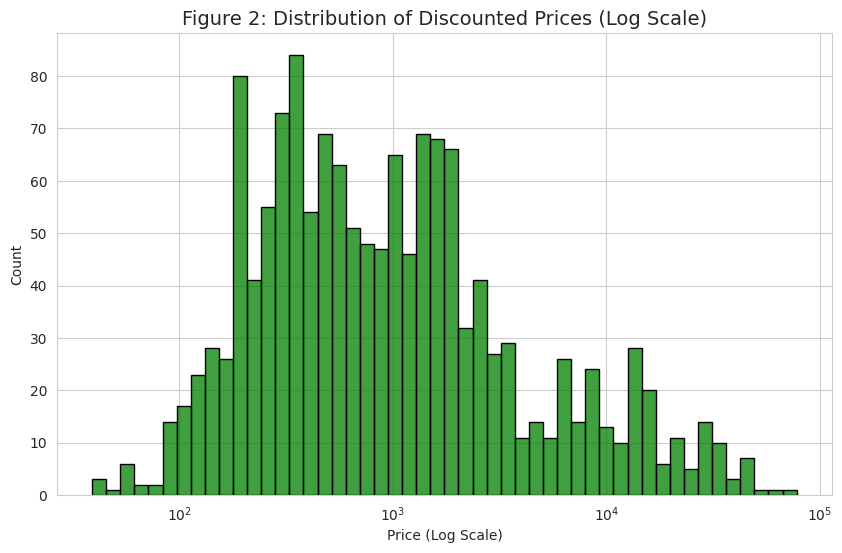

In [76]:
plt.figure()
sns.histplot(data['discounted_price'], bins=50, log_scale=True, color='green', edgecolor='black')
plt.title('Figure 2: Distribution of Discounted Prices (Log Scale)', fontsize=14)
plt.xlabel('Price (Log Scale)')
plt.ylabel('Count')
plt.show()

The figure shows price distribution using a Log scale because prices range from ₹100 to ₹70,000+

## Bivariate and Multivariate Analysis

We create a rounded rating column (e.g., 4.2 -> 4) for a better visualization

In [78]:
data['rating_rounded'] = data['rating'].round().astype(int)

**FIGURE 3: Impact of Promotions (Discount vs Rating)**

/tmp/ipython-input-2271535363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating_rounded', y='discount_percentage', data=data, palette='viridis')


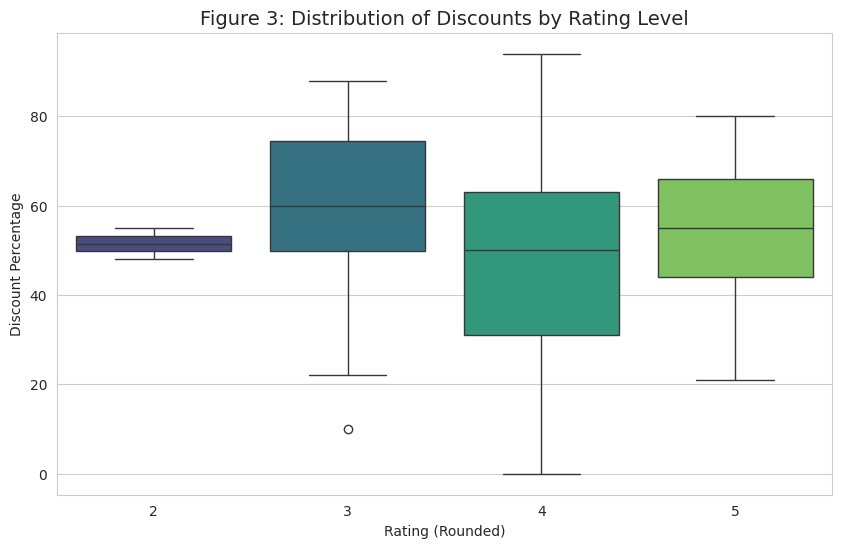

In [79]:
plt.figure()
sns.boxplot(x='rating_rounded', y='discount_percentage', data=data, palette='viridis')
plt.title('Figure 3: Distribution of Discounts by Rating Level', fontsize=14)
plt.xlabel('Rating (Rounded)')
plt.ylabel('Discount Percentage')
plt.show()

Boxplots proving that higher discounts don't necessarily mean better ratings .

**FIGURE 4: Price vs Rating Relationship**

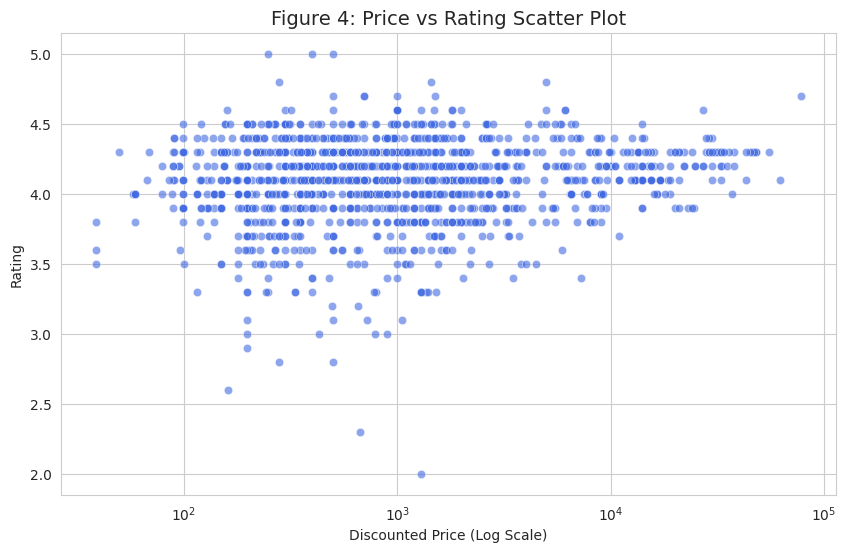

In [80]:
plt.figure()
sns.scatterplot(x='discounted_price', y='rating', data=data, alpha=0.6, color='royalblue')
plt.xscale('log') # The report explicitly mentions using Log Scale here
plt.title('Figure 4: Price vs Rating Scatter Plot', fontsize=14)
plt.xlabel('Discounted Price (Log Scale)')
plt.ylabel('Rating')
plt.show()

A scatter plot confirming there is no strong linear link between Price and Rating .

**FIGURE 5: Impact of Popularity (Categories)**

We sum the 'rating_count' (popularity) by 'main_category'

In [81]:
category_popularity = data.groupby('main_category')['rating_count'].sum().sort_values(ascending=False).head(10)

/tmp/ipython-input-2011479859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_popularity.values, y=category_popularity.index, palette='magma')


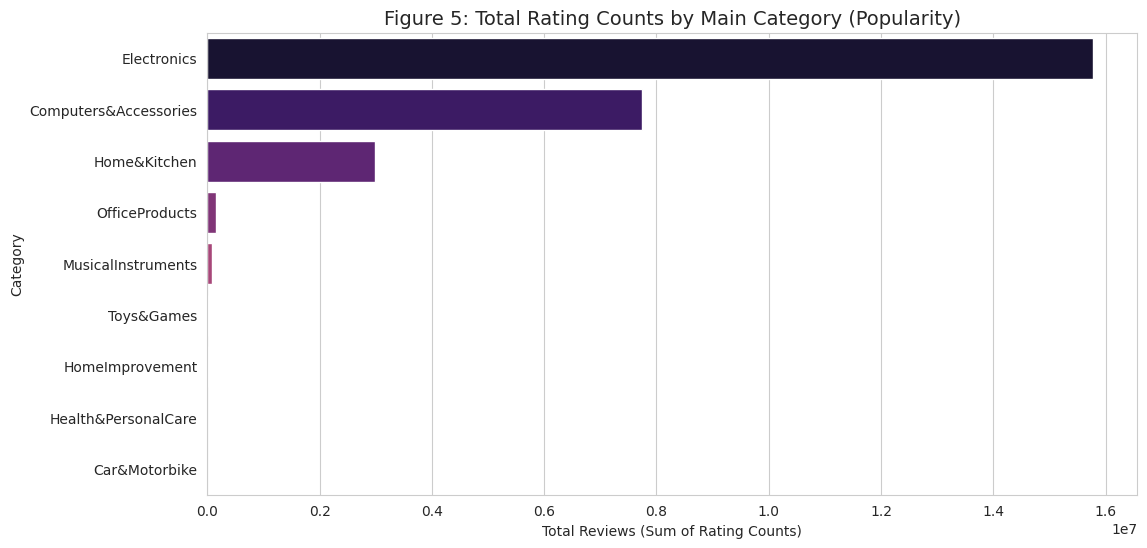

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_popularity.values, y=category_popularity.index, palette='magma')
plt.title('Figure 5: Total Rating Counts by Main Category (Popularity)', fontsize=14)
plt.xlabel('Total Reviews (Sum of Rating Counts)')
plt.ylabel('Category')
plt.show()

A bar chart showing "Electronics" is the most popular category.

**FIGURE 6: Correlation Matrix**

Select only relevant numerical columns

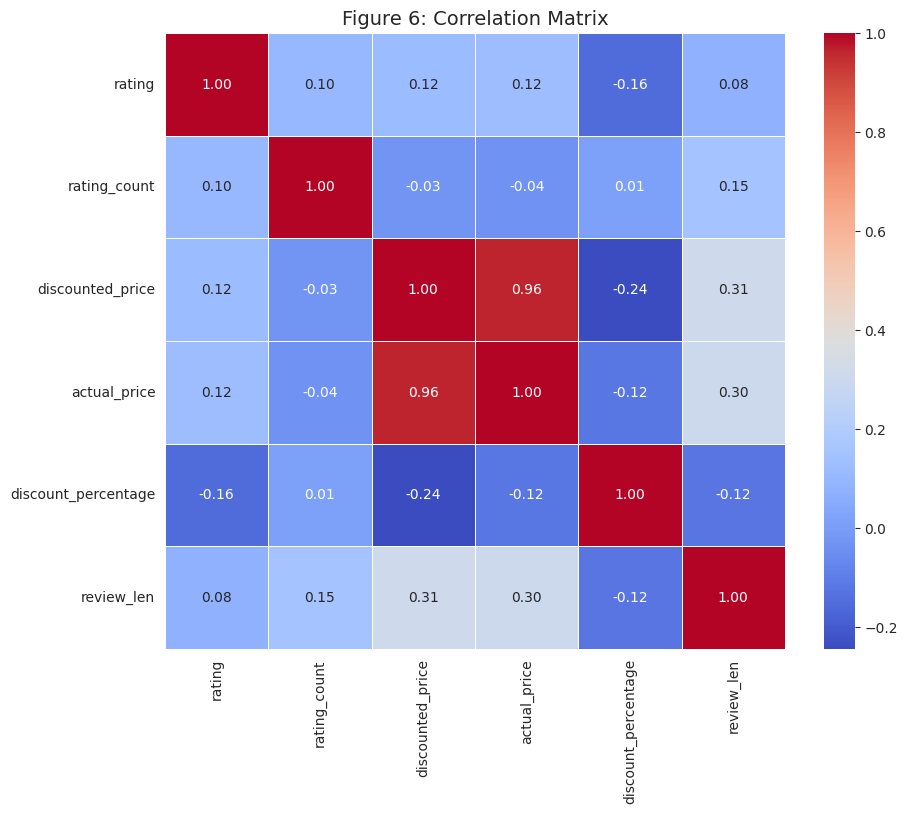

In [83]:
plt.figure(figsize=(10, 8))

numerical_cols = ['rating', 'rating_count', 'discounted_price', 'actual_price', 'discount_percentage', 'review_len']
corr_matrix = data[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Figure 6: Correlation Matrix', fontsize=14)
plt.show()

he heatmap showing the correlation between variables (e.g., 0.96 between actual and discounted price, shows that these 2 variables are strong correlation so strong relationship).

# **After EDA**

3. Vectorisation (TF-IDF)

we use TfidfVectorizer from Scikit-learn because it’s the perfect tool for text vectorization. He goes:
1. Count the words
2. Remove the English "stop words"
3. Calculate the TF-IDF scores.

This will turn our clean_review column into thousands of numeric columns (one for each important word).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

print("Vectorisation TF-IDF ")
# fit_transform() : learn vocabulary + transform text to numbers (scores)

tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_review'])

This lines code provide the initialization of the vectorizer. Firstly, we automatically removes words like "the", "is", "and"... with stop_words='english'. Then, we only keep the most important 5000 words to avoid having an huge matrix that would slow everything down (max_features=5000).

We test the code below :

In [ ]:
print("-" * 30)
print(f"Dimension of the TF-IDF matrix : {tfidf_matrix.shape}")

print("\n20 words captured:")
print(tfidf_vectorizer.get_feature_names_out()[:20])

### Phase 2 (Gabriel)

In [ ]:
from transformers import pipeline

def review_to_score(text: str) -> float:
    """
    Utilise un modèle pré-entraîné pour convertir une review en score (1-5).
    Aucun entraînement nécessaire.
    """
    sentiment = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
    result = sentiment(text[:512])[0]  # le modèle supporte plusieurs langues
    label = result["label"]  # ex: "4 stars"
    return result

print(review_to_score("Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet"))     # → 5.0
print(review_to_score("It's quite good and value for money,Works well,Hdmi cable,Value for money,All good,Gets the job done,Delivery was good,This one was my need to purchase")) # → 1.0
print(review_to_score("Cheap product and same is the performance but does the job,Good,No Box!!!,Good,Value for money,A very good quality cable with rubust built, and it does the work.,Value money,Good product."))
print(review_to_score("Very hard to use,Good,Required Replacement but replaced one is Good,Good product & connectivity,Used remote delivered,VFM, Perfectly Compatible.,Working fine with mi tv4,I've bought it 4 times in a year"))
print(review_to_score("Durable,Good Product,Okay 👌,So far so good,An absolute best,Good cable,Worth the money,Good for charging Not good for data transfer"))

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


{'label': '4 stars', 'score': 0.7067959904670715}


Device set to use cpu


{'label': '5 stars', 'score': 0.5752504467964172}


Device set to use cpu


{'label': '3 stars', 'score': 0.4209575951099396}


Device set to use cpu


{'label': '3 stars', 'score': 0.3642353415489197}


Device set to use cpu


{'label': '4 stars', 'score': 0.5486212968826294}
